In [1]:
import re
import string
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Lambda, Conv1D, MaxPooling1D, LSTM, Dropout, Embedding, Bidirectional
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import backend as K
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
Data = pd.read_csv('tweet_emotions.csv')
Data.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


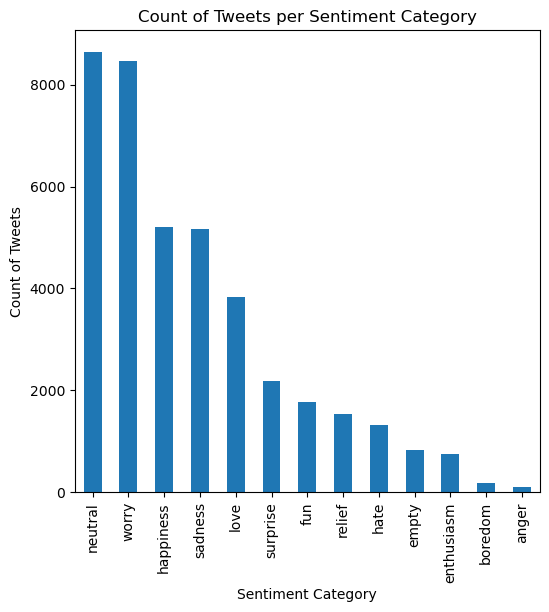

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))
Data['sentiment'].value_counts().plot(kind='bar', ax=ax)
ax.set_xlabel('Sentiment Category')
ax.set_ylabel('Count of Tweets')
ax.set_title('Count of Tweets per Sentiment Category')
plt.show()

In [4]:
Data = Data[['content', 'sentiment']]
Data.head()

,content,sentiment
0,@tiffanylue i know i was listenin to bad habi...,empty
1,Layin n bed with a headache ughhhh...waitin o...,sadness
2,Funeral ceremony...gloomy friday...,sadness
3,wants to hang out with friends SOON!,enthusiasm
4,@dannycastillo We want to trade with someone w...,neutral


In [5]:
print(Data.isnull().sum())

content      0
sentiment    0
dtype: int64


In [6]:
Data.drop_duplicates(inplace=True)

In [7]:
# Preprocess the text data by removing stop words, punctuation, and other irrelevant information
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # Join the tokens back into a single string
    text = ' '.join(filtered_tokens)
    return text

# Apply the preprocess_text function to the 'content' column of the dataframe
Data['content'] = Data['content'].apply(preprocess_text)

In [8]:
Data.head()

,content,sentiment
0,tiffanylue know listenin bad habit earlier sta...,empty
1,layin n bed headache ughhhhwaitin call,sadness
2,funeral ceremonygloomy friday,sadness
3,wants hang friends soon,enthusiasm
4,dannycastillo want trade someone houston ticke...,neutral


In [9]:
Data.to_csv('new_tweet_emotions.csv', index=False)

In [10]:
data = pd.read_csv('new_tweet_emotions.csv')
data.head()

,content,sentiment
0,tiffanylue know listenin bad habit earlier sta...,empty
1,layin n bed headache ughhhhwaitin call,sadness
2,funeral ceremonygloomy friday,sadness
3,wants hang friends soon,enthusiasm
4,dannycastillo want trade someone houston ticke...,neutral


In [11]:
# Get the unique values in the 'sentiment' column
unique_labels = data['sentiment'].unique()

# Print the unique labels
print(unique_labels)

['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happiness' 'boredom' 'relief' 'anger']


In [12]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# read the CSV file into a Pandas DataFrame
data = pd.read_csv('new_tweet_emotions.csv')

# split the dataset into input features (X) and output labels (y)
X = data['content']
y = data['sentiment']

# initialize the oversampler
oversampler = RandomOverSampler()

# fit the oversampler to the data and resample it
X_resampled, y_resampled = oversampler.fit_resample(X.values.reshape(-1, 1), y)

# convert the resampled data back to a Pandas DataFrame
resampled_data = pd.DataFrame({'content': X_resampled.flatten(), 'sentiment': y_resampled})

# check the resampled data
print(resampled_data['sentiment'].value_counts())
data = resampled_data

empty         8617
sadness       8617
enthusiasm    8617
neutral       8617
worry         8617
surprise      8617
love          8617
fun           8617
hate          8617
happiness     8617
boredom       8617
relief        8617
anger         8617
Name: sentiment, dtype: int64


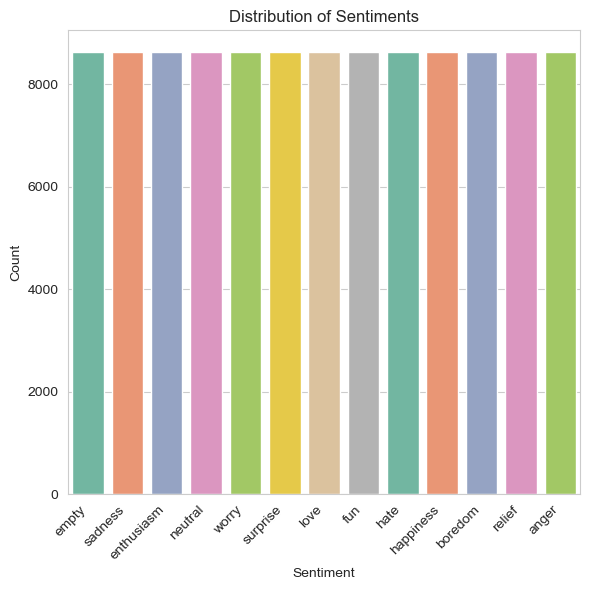

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_palette('Set2')

plt.figure(figsize=(6, 6))
sns.countplot(x='sentiment', data=data, palette='Set2')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder to the 'sentiment' column
le.fit(data['sentiment'])

# Convert the 'sentiment' column to numeric values
data['sentiment'] = le.transform(data['sentiment'])

# Print the updated data
print(data.head())

                                             content  sentiment
0  tiffanylue know listenin bad habit earlier sta...          2
1             layin n bed headache ughhhhwaitin call         10
2                      funeral ceremonygloomy friday         10
3                            wants hang friends soon          3
4  dannycastillo want trade someone houston ticke...          8


In [15]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from keras.utils import to_categorical
import pandas as pd


In [16]:
data = data.dropna(subset=['content'])
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['content'], data['sentiment'], test_size=0.2, random_state=42)

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
from imblearn.over_sampling import SMOTE

def smote_oversample(X, y):
    smote = SMOTE()
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled

# ---------------------------------------------------------------------------------------------------------------

In [19]:

# Tokenize the input text
tokenizer = Tokenizer(num_words=5000, split=' ')
tokenizer.fit_on_texts(X_train.values)

# Convert the text into sequences
X_train_seq = tokenizer.texts_to_sequences(X_train.values)
X_test_seq = tokenizer.texts_to_sequences(X_test.values)

# Pad the sequences to a fixed length
max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Convert the labels to one-hot encoded vectors
num_classes = len(data['sentiment'].unique())
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# # Define the model architecture
# model = Sequential()
# model.add(Embedding(5000, 128, input_length=max_len))
# model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))

In [20]:
# from imblearn.over_sampling import SMOTE
# from keras.preprocessing.text import Tokenizer
# from keras.utils import to_categorical

# # Apply SMOTE oversampling
# print("Class distribution before balancing:\n", X_train_pad.value_counts())
# sm = SMOTE(random_state=42)
# X_train_pad, y_train_cat = sm.fit_resample(X_train_pad, y_train_cat)
# print("Class distribution after balancing:\n", X_train_pad.value_counts())

In [21]:
from keras.layers import Input, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from keras.models import Model
import numpy as np

# Load pre-trained word embeddings
embedding_dim = 300
embeddings_index = {}
with open('glove.6B.300d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Create embedding matrix
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [37]:
# Define model architecture
# inputs = Input(shape=(max_len,))
# x = Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], trainable=False)(inputs)
# x = Conv1D(filters=128, kernel_size=3, activation='relu')(x)
# x = MaxPooling1D(pool_size=2)(x)
# x = Conv1D(filters=256, kernel_size=3, activation='relu')(x)
# x = Conv1D(filters=512, kernel_size=3, activation='relu')(x)
# x = GlobalMaxPooling1D()(x)
# x = Dense(256, activation='relu')(x)
# x = Dropout(0.5)(x)
# x = Dense(128, activation='relu')(x)
# x = Dropout(0.5)(x)
# outputs = Dense(num_classes, activation='softmax')(x)
# model = Model(inputs=inputs, outputs=outputs)

inputs = Input(shape=(max_len,))
x = Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], trainable=False)(inputs)
x = Conv1D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPooling1D(pool_size=2)(x)
x = Bidirectional(LSTM(32, return_sequences=True))(x)
x = Conv1D(filters=128, kernel_size=3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)



# from tensorflow.keras.regularizers import l2

# inputs = Input(shape=(max_len,))
# x = Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], trainable=False)(inputs)
# x = Conv1D(filters=128, kernel_size=3, activation='relu')(x)
# x = MaxPooling1D(pool_size=2)(x)
# x = Conv1D(filters=256, kernel_size=3, activation='relu')(x)
# x = Conv1D(filters=512, kernel_size=3, activation='relu')(x)
# x = GlobalMaxPooling1D()(x)
# x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
# x = Dropout(0.5)(x)
# x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
# x = Dropout(0.5)(x)
# outputs = Dense(num_classes, activation='softmax')(x)
# model = Model(inputs=inputs, outputs=outputs)



In [38]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import ReduceLROnPlateau

# Define the callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.0001)

In [64]:
# Train the model
history = model.fit(X_train_pad, y_train_cat, batch_size=128, epochs=20, verbose=1,
          validation_data=(X_test_pad, y_test_cat), callbacks=[reduce_lr])

Epoch 1/20
700/700 [==============================] - 72s 102ms/step - loss: 0.3381 - accuracy: 0.8769 - val_loss: 0.8588 - val_accuracy: 0.7972 - lr: 1.0000e-04
Epoch 2/20
700/700 [==============================] - 87s 124ms/step - loss: 0.3366 - accuracy: 0.8781 - val_loss: 0.8719 - val_accuracy: 0.7968 - lr: 1.0000e-04
Epoch 3/20
700/700 [==============================] - 84s 119ms/step - loss: 0.3308 - accuracy: 0.8808 - val_loss: 0.8815 - val_accuracy: 0.7956 - lr: 1.0000e-04
Epoch 4/20
700/700 [==============================] - 81s 116ms/step - loss: 0.3278 - accuracy: 0.8820 - val_loss: 0.8895 - val_accuracy: 0.7971 - lr: 1.0000e-04
Epoch 5/20
700/700 [==============================] - 87s 124ms/step - loss: 0.3229 - accuracy: 0.8838 - val_loss: 0.8914 - val_accuracy: 0.7981 - lr: 1.0000e-04
Epoch 6/20
700/700 [==============================] - 100s 143ms/step - loss: 0.3202 - accuracy: 0.8843 - val_loss: 0.9063 - val_accuracy: 0.7973 - lr: 1.0000e-04
Epoch 7/20
700/700 [=======

In [65]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


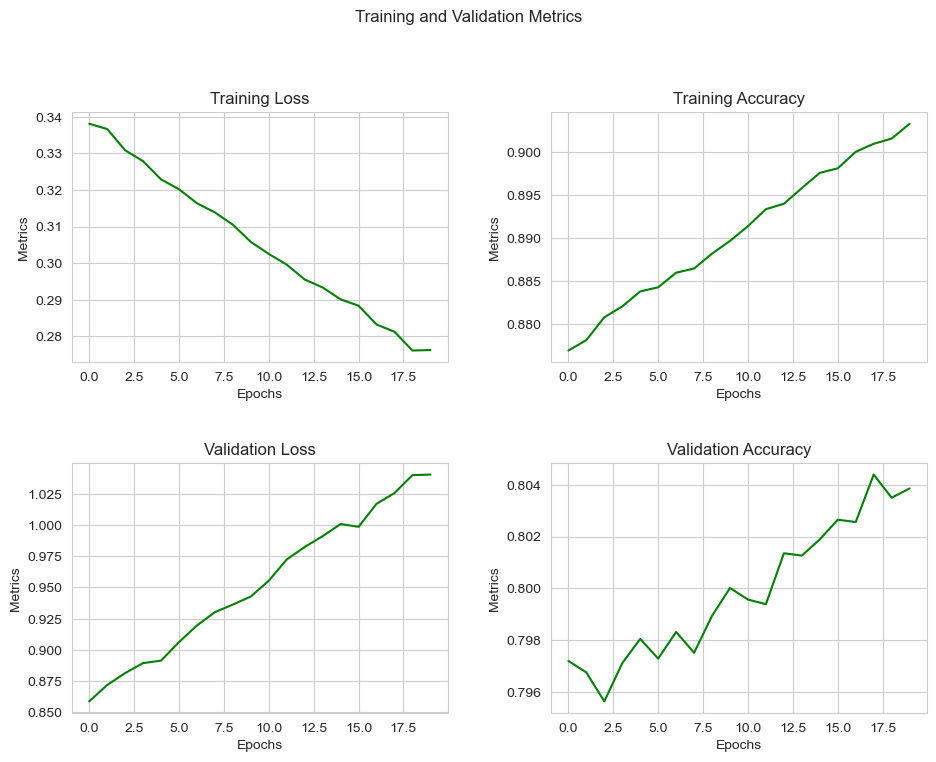

In [66]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# plot each metric in a separate subplot
axs[0, 0].plot(history.history['loss'],color='g')
axs[0, 0].set_title('Training Loss')
axs[0, 1].plot(history.history['accuracy'],color='g')
axs[0, 1].set_title('Training Accuracy')
axs[1, 0].plot(history.history['val_loss'],color='g')
axs[1, 0].set_title('Validation Loss')
axs[1, 1].plot(history.history['val_accuracy'],color='g')
axs[1, 1].set_title('Validation Accuracy')

# set the labels and title
fig.suptitle('Training and Validation Metrics')
for ax in axs.flat:
    ax.set(xlabel='Epochs', ylabel='Metrics')
    
# adjust the spacing between subplots
fig.tight_layout(pad=3.0)

# show the plot
plt.show()

In [55]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_4 (Embedding)     (None, 100, 300)          14111700  
                                                                 
 conv1d_11 (Conv1D)          (None, 98, 64)            57664     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 49, 64)           0         
 1D)                                                             
                                                                 
 bidirectional_1 (Bidirectio  (None, 49, 64)           24832     
 nal)                                                            
                                                                 
 conv1d_12 (Conv1D)          (None, 47, 128)           2470

In [67]:
# Evaluate the model
score, acc = model.evaluate(X_test_pad, y_test_cat, batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

700/700 [==============================] - 8s 11ms/step - loss: 1.0403 - accuracy: 0.8039
Test score: 1.0403449535369873
Test accuracy: 0.803857684135437


In [68]:
# Get the predicted sentiment for a new sentence
new_sentence = "go away"
new_seq = tokenizer.texts_to_sequences([new_sentence])
new_pad = pad_sequences(new_seq, maxlen=max_len, padding='post')
new_pred = model.predict(new_pad)[0]

# Convert the predicted sentiment probabilities into a sentiment label
sentiment_labels = data['sentiment']
new_sentiment = sentiment_labels[np.argmax(new_pred)]

label_map = {0: 'empty', 1: 'sadness', 2: 'enthusiasm', 3: 'neutral', 4: 'worry', 5: 'surprise', 6: 'love', 7: 'fun', 8: 'hate', 9: 'happiness', 10: 'boredom', 11: 'relief', 12: 'anger'}
print(f"The predicted sentiment for '{new_sentence}' is: {label_map[int(new_sentiment)]}")

1/1 [==============================] - 0s 24ms/step
The predicted sentiment for 'go away' is: boredom


In [ ]:
model.save('my_model.h5')

In [2]:
from keras.models import load_model

model = load_model('my_model.h5')